In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Lemalabs/Data/'
data = pd.read_csv(path+'Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
0,1,Male,19,15,39,39
1,2,Male,21,15,81,81
2,3,Female,20,16,6,6
3,4,Female,23,16,77,77
4,5,Female,31,17,40,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Unnamed: 5'],
      dtype='object')

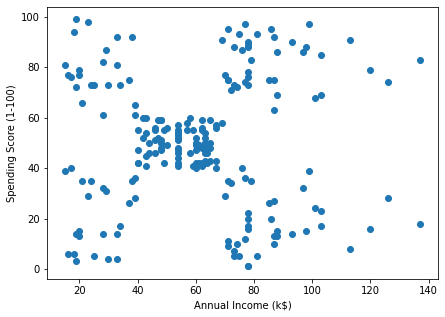

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
x = data.iloc[:,3:5]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
x = np.array(x)

# **Initialise the Centroids**

Randomly assign a few data points as initial centroids

In [ ]:
k = 5
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    index = np.random.randint(0, m, k) # Generate random K indices from 0 to m

    for i in range(k):
        centroids[i,:] = X[index[i],:]
    
    return centroids

In [ ]:
initial_centroids = init_centroids(x, k)

In [ ]:
initial_centroids

array([[21., 66.],
       [40., 55.],
       [88., 13.],
       [29., 31.],
       [78., 90.]])

### Plotting the Centroids in different colors 

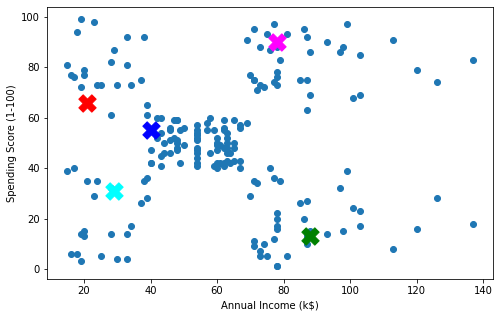

In [ ]:
color=['red','blue','green','cyan','magenta']
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(k):
  ax.scatter(initial_centroids[z][0], initial_centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### **Find the Closest Centroid**

In [ ]:
def find_closest_centroids(X, centroids):
    m = X.shape[0] # find the number of data samples
    k = centroids.shape[0]    # Find the number of centroids
    nearby_centroid = np.zeros(m)    # initialise the an array
    
    for i in range(m):
        min_dist = float('inf') # Arbitrarily set some high initial distance

        # assign Centroid to a data sample
        for j in range(k):
            #Find the distance between input X (x1, x2) and Centroid J (j1, j2)
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist #if the distance is small make it as the minimum distance
                nearby_centroid[i] = j #assign the centorid J to the ith sample
    
    return nearby_centroid #return the closest centroids for all data samples

In [ ]:
nearby_centroid = find_closest_centroids(x, initial_centroids)
print(nearby_centroid)

[3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0.
 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 1. 3. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4.
 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4.
 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4.
 2. 4. 2. 4. 2. 4. 2. 4.]


### **Find the new Centroids**

#####Locate all the indicies of the a same cluster

1.   Locate all the indicies of the a same cluster
2.   Find the mean of the cluster
3.   Make the mean as the centroid of the cluster

In [ ]:
def compute_centroids(X, nearby_centroid, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
        
    for i in range(k):
        indices = np.where(nearby_centroid == i) #find all the indices that belong to the same cluster

        sum_of_cluster = np.sum(X[indices,:], axis=1)
      
        centroids[i,:] = (sum_of_cluster / len(indices[0])) # mean of the cluster is the centroid
    
    return centroids

In [ ]:
New_centroids = compute_centroids(x, nearby_centroid, k)
New_centroids

array([[25.0952381 , 80.04761905],
       [54.41772152, 50.21518987],
       [87.        , 18.63157895],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

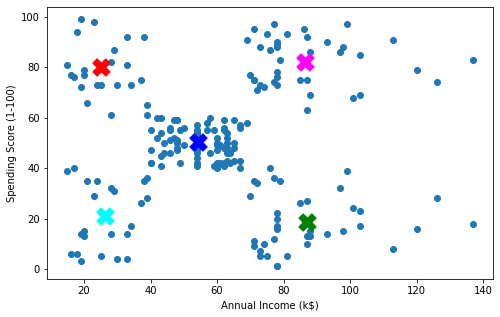

In [ ]:
color=['red','blue','green','cyan','magenta']
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(k):
  ax.scatter(New_centroids[z][0], New_centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### **K means algorithm**


1.   Find the closest centroid and assign the data points to a centroid
2.   Find the mean of a cluster and recalculate the new centroids



In [ ]:
def k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    #k = initial_centroids.shape[0]
    centroids = initial_centroids
    
    for i in range(max_iters):
        nearby_centroid = find_closest_centroids(X, centroids) 
        centroids = compute_centroids(X, nearby_centroid, k)
    
    return nearby_centroid, centroids

In [ ]:
nearby_centroid, centroids = k_means(x, initial_centroids, 20)

In [ ]:
centroids

array([[25.72727273, 79.36363636],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

In [ ]:
nearby_centroid

array([3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3.,
       0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0., 3., 0.,
       3., 0., 3., 0., 3., 0., 3., 0., 3., 1., 3., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 4., 2., 4., 1., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 1., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.])

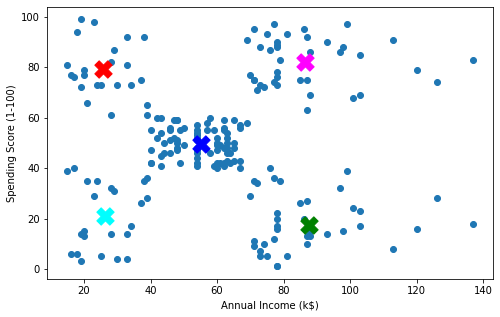

In [ ]:
color=['red','blue','green','cyan','magenta']
#K = 5
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(k):
  ax.scatter(centroids[z][0], centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
x[np.where(nearby_centroid == 0)] #find all elements of Cluster 1

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]])

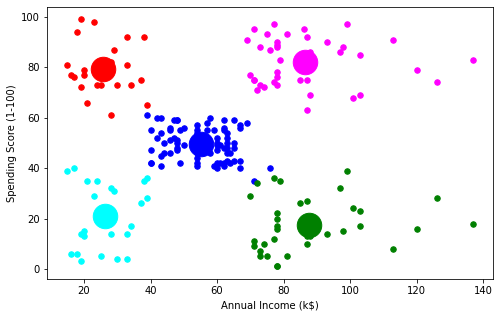

In [ ]:
cluster1 = x[np.where(nearby_centroid == 0)] #find all elements of Cluster 1
cluster2 = x[np.where(nearby_centroid == 1)] #find all elements of Cluster 2
cluster3 = x[np.where(nearby_centroid == 2)] #find all elements of Cluster 3
cluster4 = x[np.where(nearby_centroid == 3)] #find all elements of Cluster 4
cluster5 = x[np.where(nearby_centroid == 4)] #find all elements of Cluster 5

color=['red','blue','green','cyan','magenta']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='red', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='blue', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='green', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='cyan', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='magenta', label='Cluster 5')

for z in range(k):
  ax.scatter(centroids[z][0], centroids[z][1], marker='o',s=600, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()